# Computer vision

## CodeLab1 Елисеев ПИ21-1м

In [1]:
#Библиотеки:
import wget
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Скачивание изображения:
url = 'https://camo.githubusercontent.com/ec8cf13388b98a7133c6850afcf17ab4af5042802e0229c49f2242ea36d37090/68747470733a2f2f7261772e6769746875622e636f6d2f6d696b6f6c616c7973656e6b6f2f6c656e612f6d61737465722f6c656e612e706e67'
lena = wget.download(url, out = 'lena.png')

In [3]:
#Размер изображения:
img_bgr = cv2.imread(lena)
img_bgr.shape, type(img_bgr)

((512, 512, 3), numpy.ndarray)

In [4]:
#Серое изображение:
gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
print(gray_image.shape)

(512, 512)


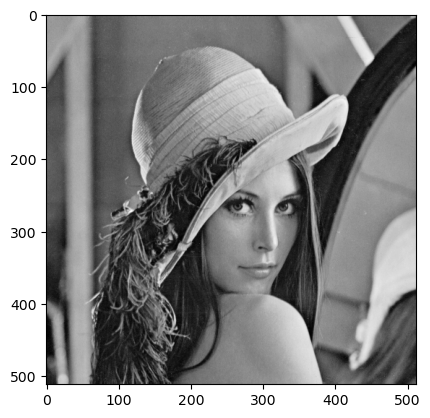

In [5]:
#Демонстрация серого изображения:
plt.imshow(gray_image, cmap='gray')
plt.show()

In [6]:
# Основные статистики изображения:
gray_image.min(), gray_image.max(), gray_image.mean()

(25, 245, 124.0485610961914)

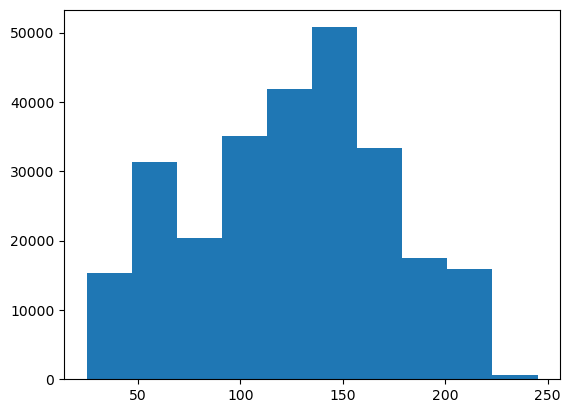

In [7]:
#Гистограмма:
plt.hist(gray_image.ravel())
plt.show()

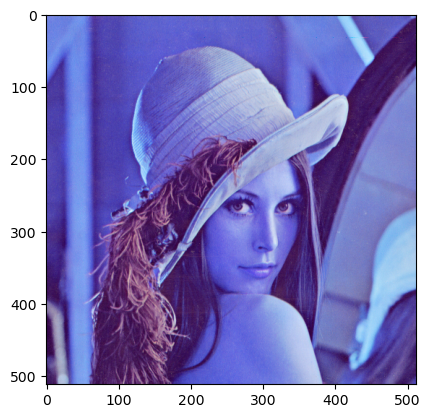

In [8]:
#bgr
plt.imshow(img_bgr)
plt.show()

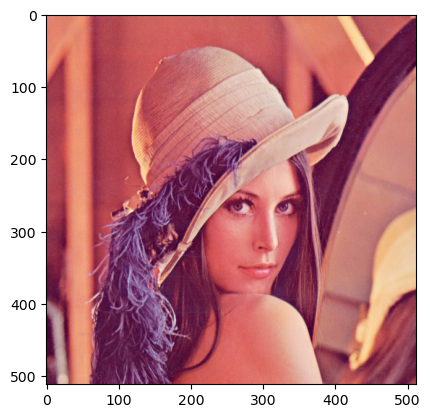

In [9]:
#bg
img = img_bgr[:, :, ::-1]
plt.imshow(img)
plt.show()

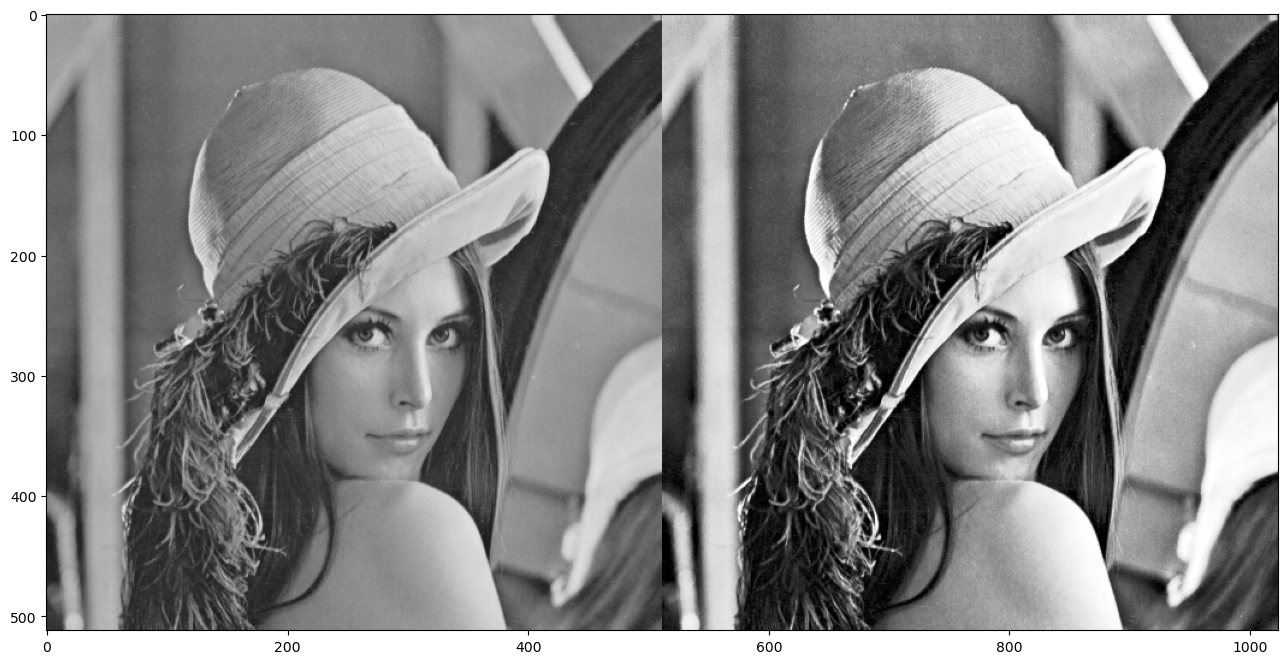

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]
[[202 202 202 ... 212 187 127]
 [202 202 202 ... 212 187 127]
 [202 202 202 ... 212 187 127]
 ...
 [  9   9  23 ...  88  81  77]
 [ 11  11  32 ...  88  90  94]
 [ 11  11  32 ...  88  90  94]]


In [10]:
# Эквивализация гистограммы
equ_img = cv2.equalizeHist(gray_image)
result = np.hstack((gray_image, equ_img))
plt.figure(figsize=(16, 8))
plt.imshow(result, cmap='gray')
plt.show()
print(gray_image)
print(equ_img)

In [11]:
#Эквализация изображения:
print(f'Original image mean: {gray_image.mean()}, std: {gray_image.std()}')
print(f'Equalized image mean: {equ_img.mean()}, std: {equ_img.std()}')

Original image mean: 124.0485610961914, std: 47.855599631086996
Equalized image mean: 128.27414321899414, std: 73.5896334380197


**Задание 1**: Нормализуйте изображения по формуле.
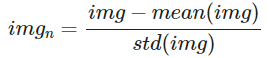
 
Затем масштабируйте нормализованное изображение в интервал [0, 255]

Отобразите результат вместе с оригинальным изображением и с эквивализированной гистограммой.

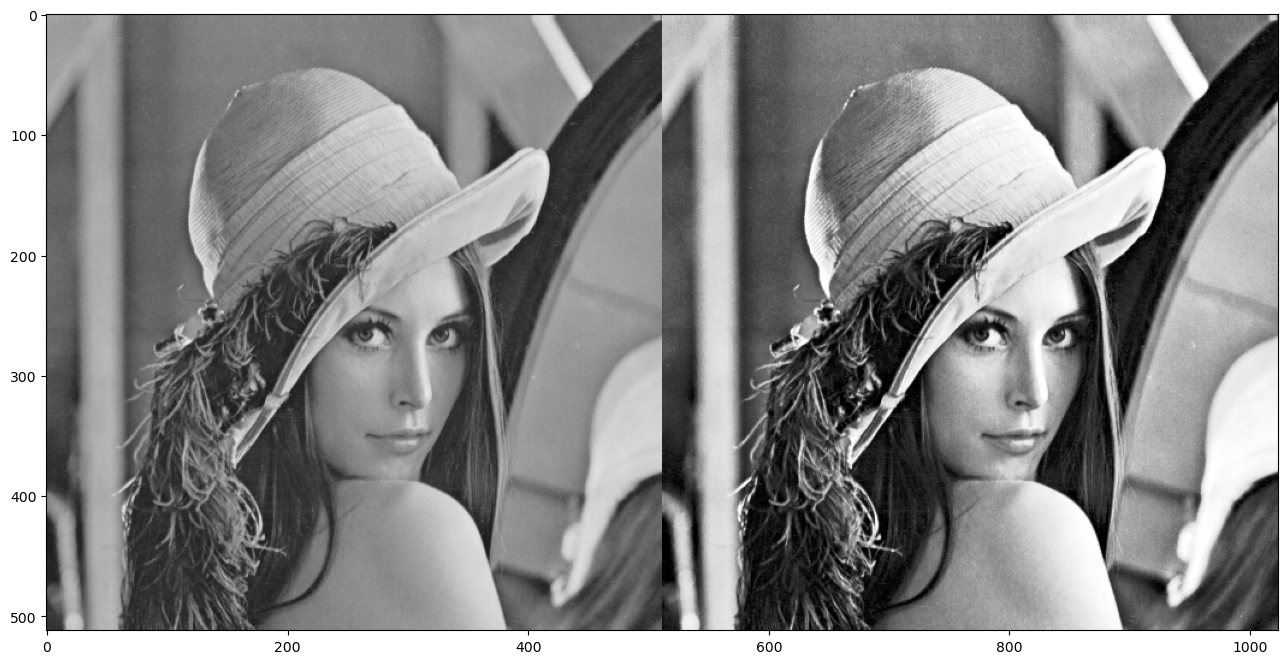

In [12]:
#Применение формулы:
img_edit = (equ_img - equ_img.mean())/equ_img.std()

#Нормализация:
img_edit = (img_edit - img_edit.min())/img_edit.max()*255

#Построение гистограмм:
res = np.hstack((img_edit, equ_img))
plt.figure(figsize=(16, 8))
plt.imshow(result, cmap='gray')
plt.show()

## Нормализация цветных изображений

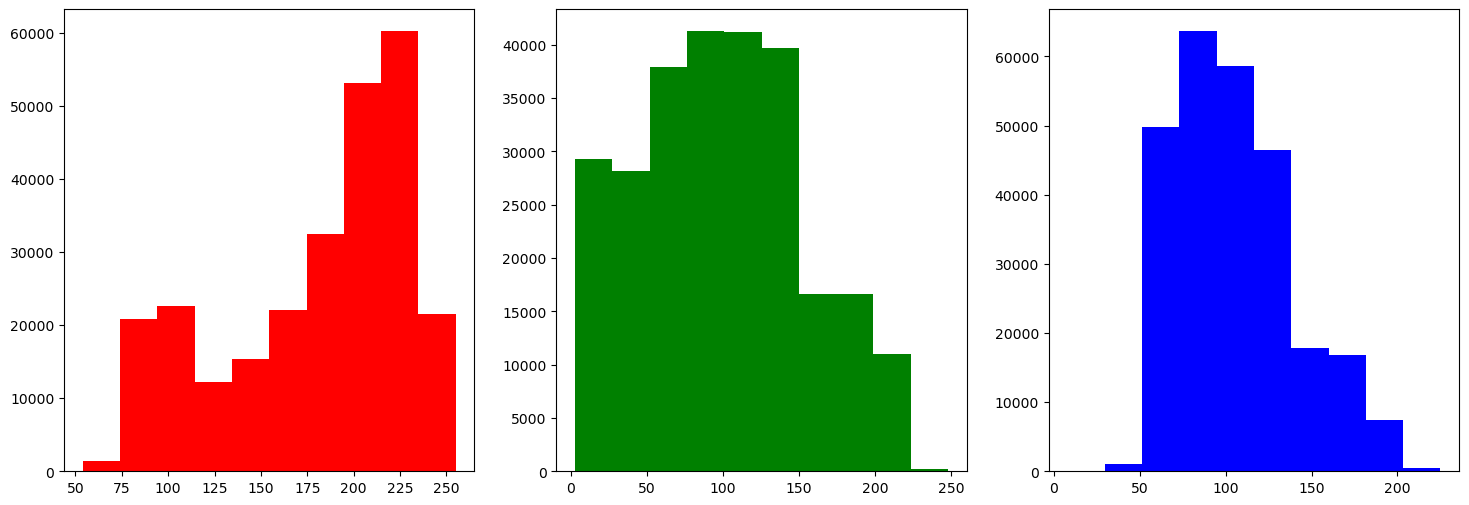

In [13]:
#Разбиение на несколько гитограмм по цветам:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.hist(img[:,:,0].ravel(), color='r')
plt.subplot(1,3,2)
plt.hist(img[:,:,1].ravel(), color='g')
plt.subplot(1,3,3)
plt.hist(img[:,:,2].ravel(), color='b')
plt.show()

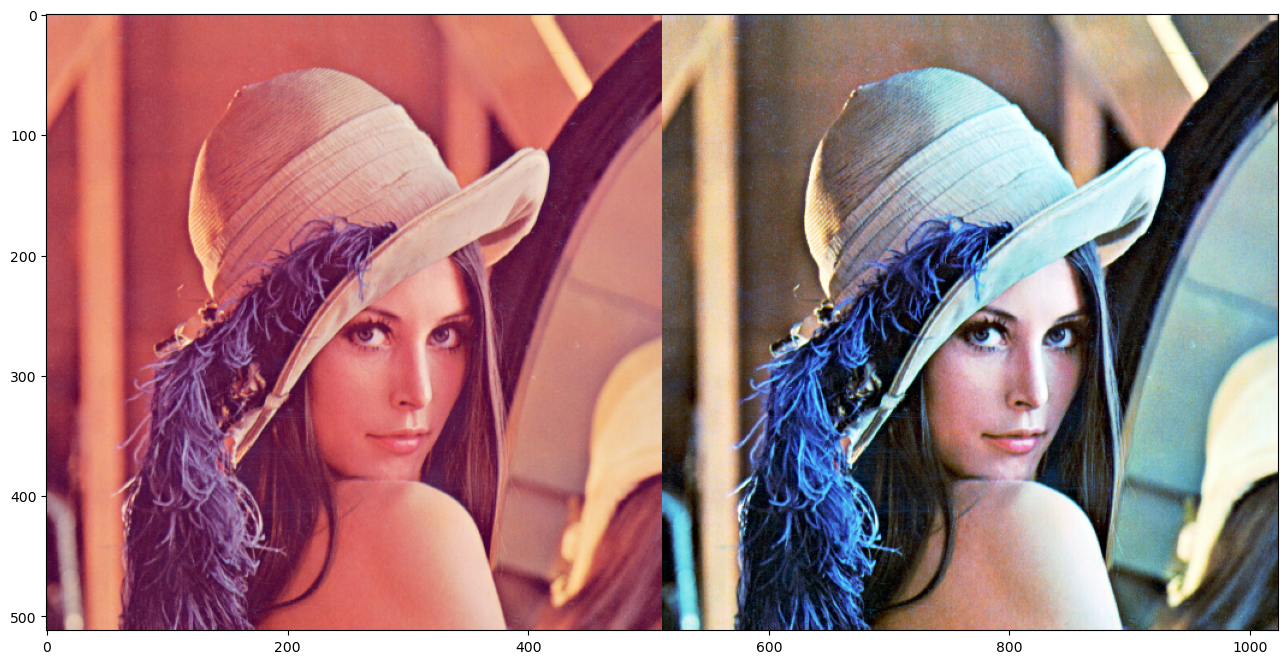

In [14]:
#Нормализация цветных слоёв:
equ_r_img = cv2.equalizeHist(img[:,:,0])
equ_g_img = cv2.equalizeHist(img[:,:,1])
equ_b_img = cv2.equalizeHist(img[:,:,2])

equ_color_img = np.stack((equ_r_img, equ_g_img, equ_b_img), axis=-1)

result = np.hstack((img, equ_color_img))
plt.figure(figsize=(16, 8))
plt.imshow(result)
plt.show()

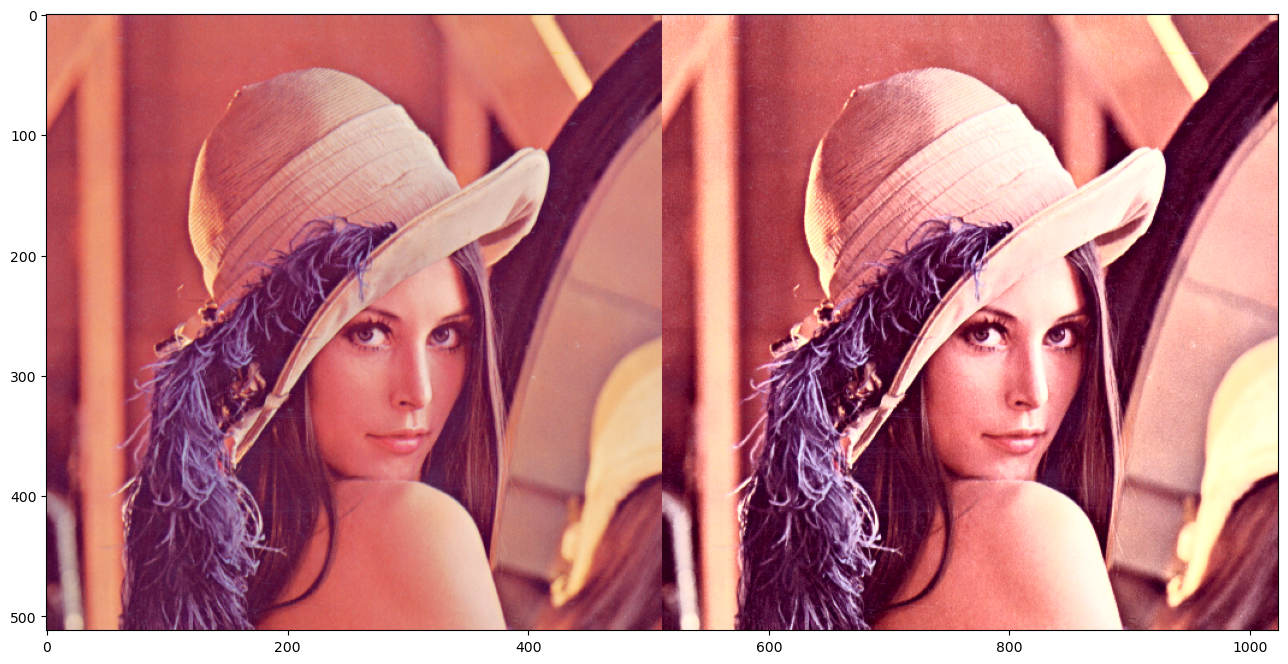

In [15]:
#Преобразование обратно в RGB-формат:
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

result = np.hstack((img, img_output))
plt.figure(figsize=(16, 8))
plt.imshow(result)
plt.show()

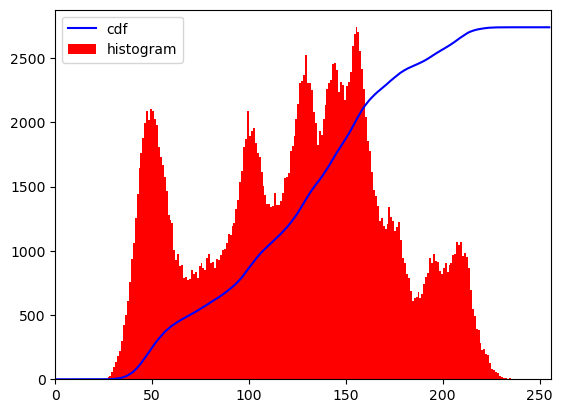

In [16]:
#Гистограмма кумулятивного распределения серого изображения:
hist, bins = np.histogram(gray_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

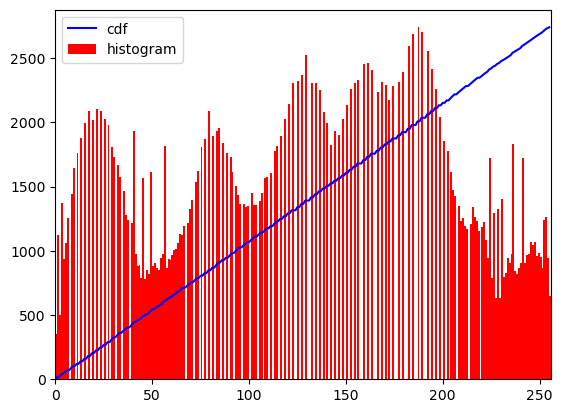

In [17]:
#Гистограмма кумулятивного распределения нормализованного изображения:
hist, bins = np.histogram(equ_img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Семинар № 2. Классические методы машинного зрения

## Свертка с ядром

In [18]:
median_img = np.zeros_like(gray_image)
M, N = gray_image.shape
KERNEL_SIZE = 5

In [19]:
#Подсчёт времени работы с циклами:

for x in range(M-KERNEL_SIZE):
  for y in range(N-KERNEL_SIZE):
    median_img[x, y] = np.mean(gray_image[x:x+KERNEL_SIZE, y:y+KERNEL_SIZE])

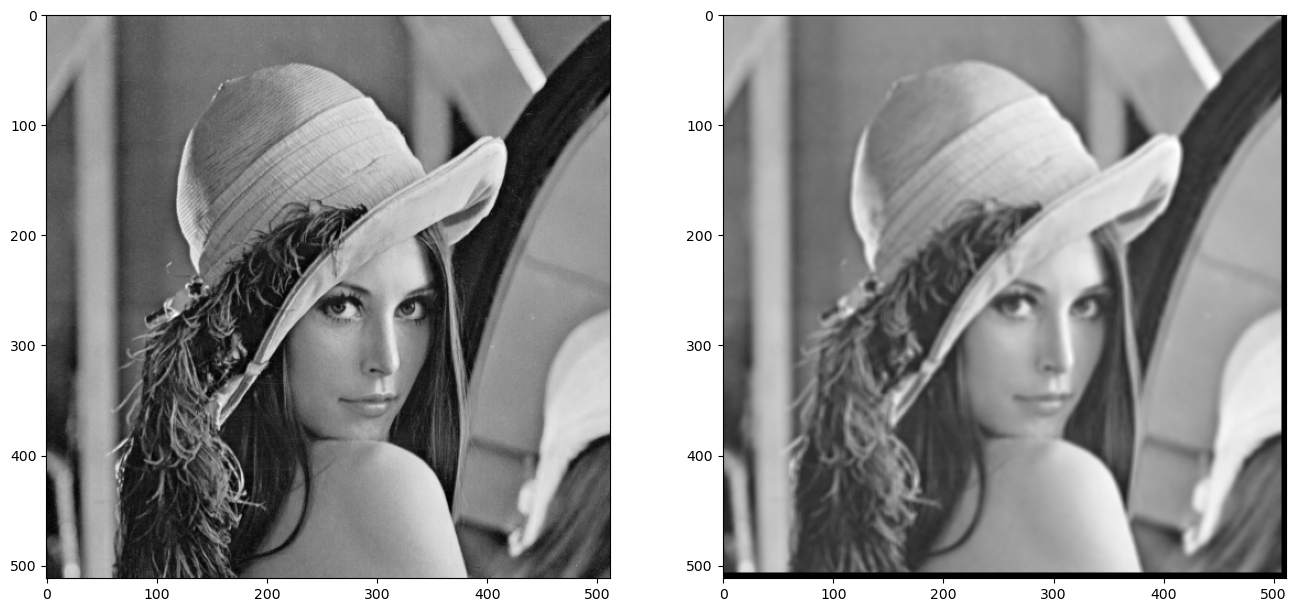

In [20]:
#Сравнение серго и "усреднённого" изображений:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(median_img, cmap='gray')
plt.show()

In [21]:
# Свертка с ядром, имеющим константные значения равноценна операции blur (размытие, усреднение)
KERNEL_SIZE = 5
kernel = np.ones((KERNEL_SIZE, KERNEL_SIZE))
kernel = kernel/kernel.size
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [22]:
gray_image[:KERNEL_SIZE, :KERNEL_SIZE]

array([[162, 162, 162, 161, 162],
       [162, 162, 162, 161, 162],
       [162, 162, 162, 161, 162],
       [162, 162, 162, 161, 162],
       [162, 162, 162, 161, 162]], dtype=uint8)

In [23]:
# Поэлементной умножение окна изображения с коэффициентами маски и их суммирование
np.sum(gray_image[:KERNEL_SIZE, :KERNEL_SIZE] * kernel)

161.8

In [24]:
#Подсчёт времени работы с openCV:


img_median = cv2.filter2D(gray_image, -1, kernel)

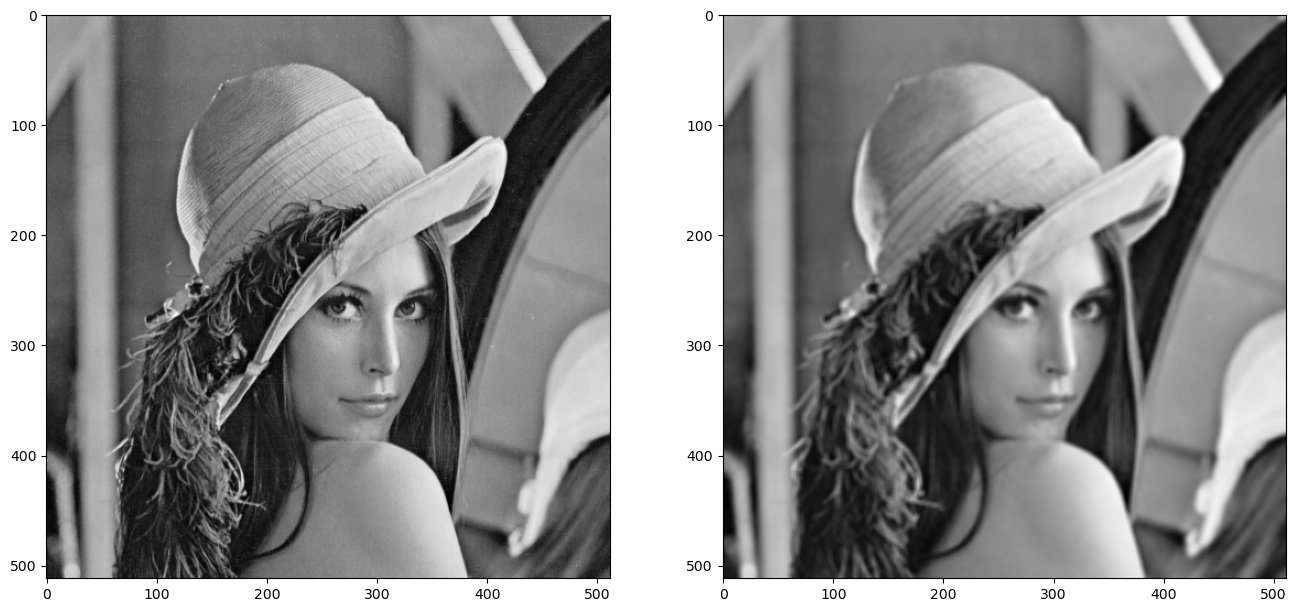

In [25]:
#Сравнение серго и "усреднённого" изображений:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_median, cmap='gray')
plt.show()

 **Задание 2**: Отобразите результат свертки с масками (kernels) из лекции: горизонтальная, вертикальная и наклонная 45 градусов. Размер kernel должен быть 5х5.



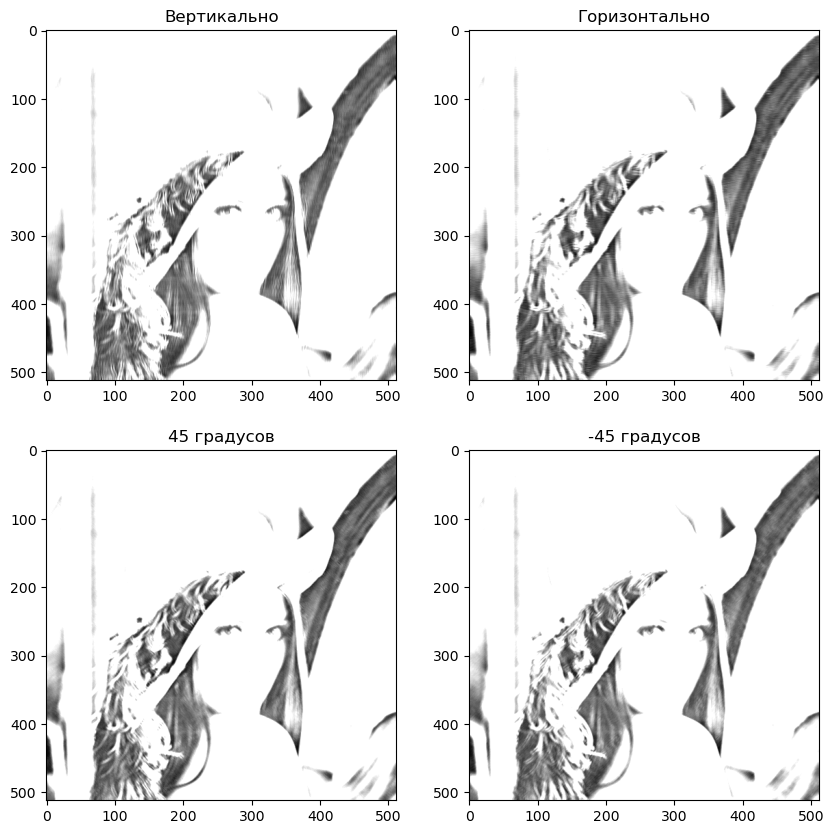

In [26]:
#Основа для масок:
size = 5
KERNEL = np.full((size, size), 0.2)

#Создание отдельных масок:
KERNEL_VERT = KERNEL.copy()
KERNEL_VERT[:, 2] = -0.2

KERNEL_HOR = KERNEL.copy()
KERNEL_HOR[2, :] = -0.2

KERNEL_45 = KERNEL.copy()
np.fill_diagonal(KERNEL_45, -0.2)

KERNEL__45 = KERNEL.copy()
KERNEL__45 = np.fliplr(KERNEL_45)

#Отображение изображений после применения масок:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax[0,0].imshow(cv2.filter2D(gray_image, -1, KERNEL_VERT), cmap = 'gray')
ax[0,0].set_title('Вертикально')
ax[0,1].imshow(cv2.filter2D(gray_image, -1, KERNEL_HOR), cmap = 'gray')
ax[0,1].set_title('Горизонтально')
ax[1,0].imshow(cv2.filter2D(gray_image, -1, KERNEL_45), cmap = 'gray')
ax[1,0].set_title('45 градусов')
ax[1,1].imshow(cv2.filter2D(gray_image, -1, KERNEL__45), cmap = 'gray')
ax[1,1].set_title('-45 градусов')
plt.show()

# Морфологические преобразования

In [27]:
#Скачивание изображения:
url = 'https://www.ccoderun.ca/programming/doxygen/opencv/dilation.png'
img = wget.download(url, out = 'j.png')

In [28]:
j_img = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)

In [29]:
#Задание маски:
element = np.array([[0, 1, 1, 0],
                    [1, 1, 1, 1],
                    [1, 1, 1, 1],
                    [0, 1, 1, 0]], dtype=np.uint8)

In [30]:
#Выполнение
erosion_img = cv2.erode(j_img, element)
dilate_img = cv2.dilate(j_img, element)

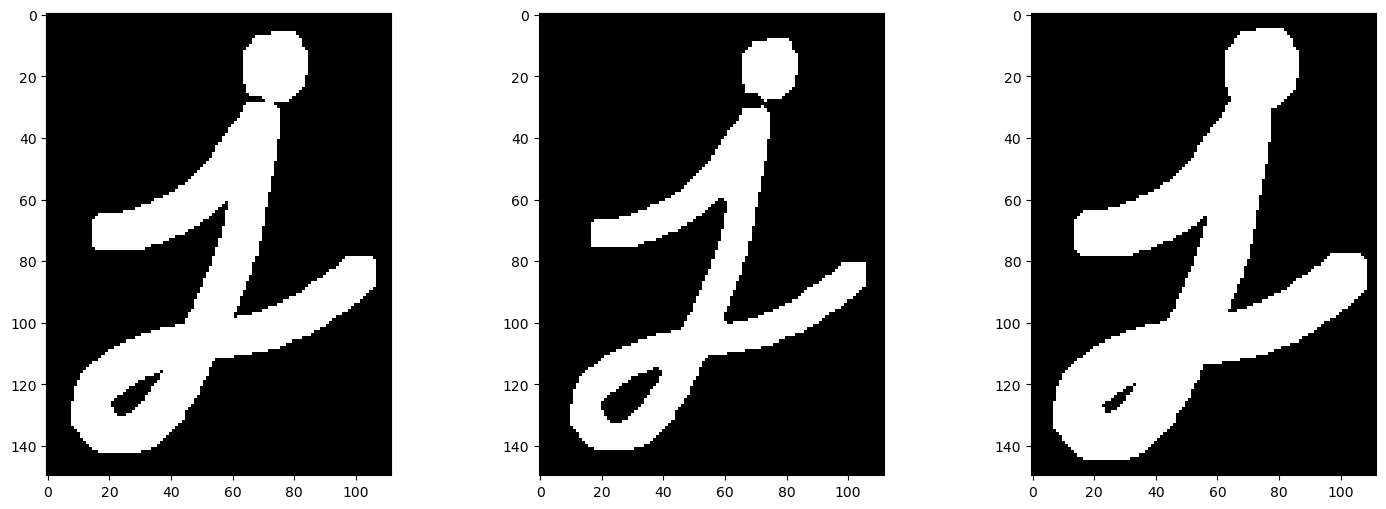

In [31]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.imshow(j_img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(erosion_img, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(dilate_img, cmap='gray')
plt.show()

**Задание 3**: отобразите результаты операций cv2.opening and cv2.closing Изображения нужно подобрать самостоятельно, чтобы был виден результат преобразований.

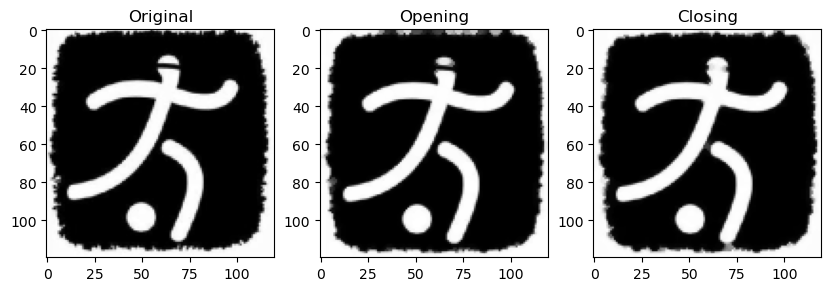

In [32]:
#Скачивание изображения:
url = 'https://img0.aiscore.com/football/competition/878991acc8aac3d4be4e888c2de38fb8.png!w120'
img = wget.download(url, out = 'at.png')
lam_img = cv2.imread('at.png', cv2.IMREAD_GRAYSCALE)

#Применение преобразований:
opening_img = cv2.morphologyEx(lam_img, cv2.MORPH_OPEN,
                           element, iterations=1)

closing_img = cv2.morphologyEx(lam_img, cv2.MORPH_CLOSE,
                           element, iterations=1)

#Отображение результатов:
plt.figure(figsize=(10, 6))
plt.subplot(1,3,1)
plt.imshow(lam_img, cmap='gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(opening_img, cmap='gray')
plt.title('Opening')
plt.subplot(1,3,3)
plt.imshow(closing_img, cmap='gray')
plt.title('Closing')
plt.show()

## Геометрические (аффинные) преобразования изображения.

In [33]:
#Исходные координаты
import string

a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)
A = np.array([a, b, c, d])
I = np.eye(3)

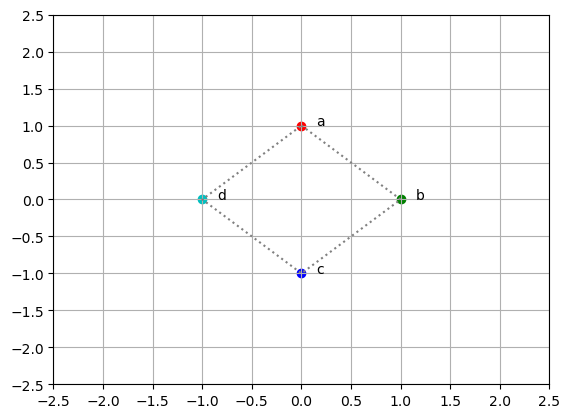

In [34]:
#Исходное положение
color_lut = 'rgbc' # ['r', 'g', 'b', 'c']
fig = plt.figure()
ax = plt.gca()
xs = []
ys = []
for row in A:
    output_row = I @ row
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) 
    c = color_lut[i]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
xs.append(xs[0])
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

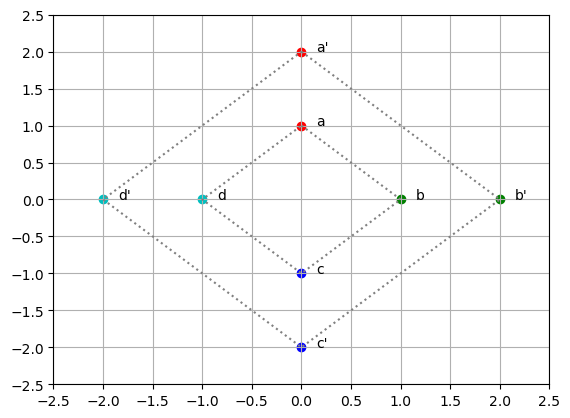

In [35]:
#Поcле афинного преобразования "Изменение масштаба"
T_s = np.array([[2, 0, 0], 
                [0, 2, 0], 
                [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = T_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) 
    c, c_s = color_lut[i], color_lut[i_s] 
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))

plt.grid()
plt.show()

## Задание 4: реализуйте два любых на выбор аффинных преобразования из лекции.

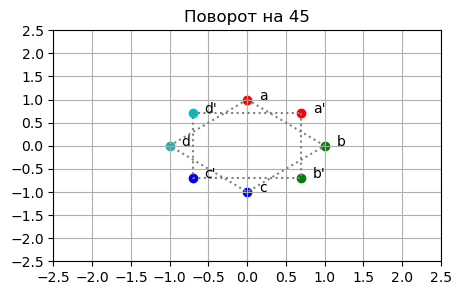

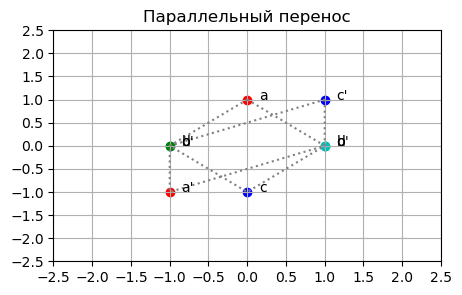

In [36]:
#Афинное преобразование "Поворот"
P_s = np.array([[0.7, 0.7, 0], 
                [-0.7, 0.7, 0], 
                [0, 0, 1]])

fig = plt.figure(figsize=(5, 3))
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = P_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) 
    c, c_s = color_lut[i], color_lut[i_s] 
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))

plt.title('Поворот на 45')
plt.grid()

#Афинное преобразование "Параллельный перенос"
P_r = np.array([[1, 1, 0], 
                [0, 1, 0], 
                [2, 2, 1]])

fig = plt.figure(figsize=(5, 3))
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = P_r @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) 
    c, c_s = color_lut[i], color_lut[i_s] 
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))

plt.title('Параллельный перенос')
plt.grid()
plt.show()

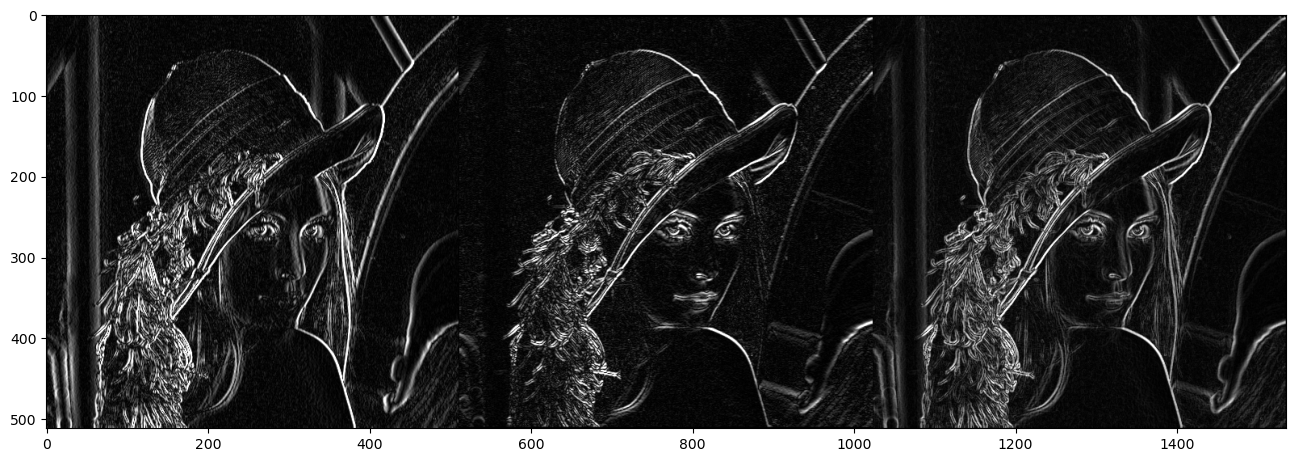

In [37]:
#Оператор Собеля
grad_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)  
grad_y = cv2.Sobel(gray_image,cv2.CV_16S, 0, 1)  

absX = cv2.convertScaleAbs(grad_x)   
absY = cv2.convertScaleAbs(grad_y)  

sobel_img = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)  

plt.figure(figsize=(16, 8))
plt.imshow(np.hstack([absX, absY, sobel_img]), cmap='gray')
plt.show()